Íñigo Martín Melero

Práctica Opcional 3b: Datos geográficos.

En esta última práctica optativa, veremos el ploteo de datos geográficos.

1. Visualización de Datos Geográficos I

1.1 Carga de Datos

In [2]:
#Cargamos los datos e importamos geopandas, que previamente hemos instalado 
#con muchas otras dependencias, gracias a un vídeo de Youtube.

import geopandas as gpd
import pandas as pd
full_data = gpd.read_file("C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional3/prestamos/kiva_loans/kiva_loans")
full_data.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


1.2 Mapa de préstamos

<AxesSubplot:>

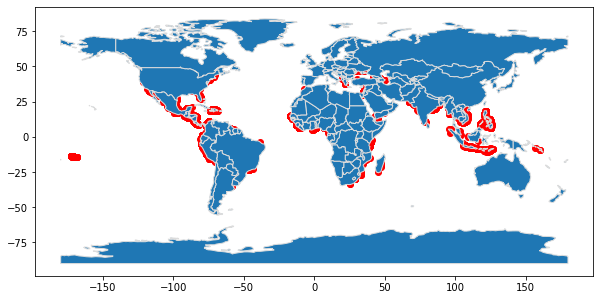

In [3]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

#Creamos un ploteo de todo el mundo, estableciendo que las fronteras estén en blanquecino.
#Las coordenadas gdp de los préstamos lo presentamos en color rojo.
ax=world.plot(edgecolor='gainsboro',zorder=3, figsize=(10,10))
full_data.plot(color='r',ax=ax)

1.3 Caso particular de Filipinas

<AxesSubplot:>

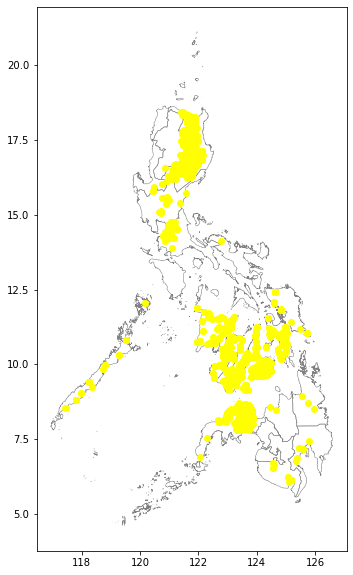

In [4]:
#Importamos el mapa particular de Filipinas, y filtramos solo los préstamos de Filipinas de full_data.
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional3/prestamos/Philippines_AL258.kml", driver='KML')
PHL.head()

filipinas=full_data[full_data['country'].isin(['Philippines'])]
ax=filipinas.plot(zorder=3, figsize=(10,10), color='yellow')
PHL.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.5)

Podemos visualizar que la mayoría de los préstamos se localizan en las islas de Luzon (en la que se halla Manila, la capital), Negros y Panay. En Samar y Mindoro la presencia es prácticamente nula, y en Mindanao y Palawan la presencia es muy escasa. Así, en estas 3 localizaciones sería interesante reforzar la oferta. 

2. Visualización de Datos Geográficos II

2.1 Carga de Datos en DataFrame

In [5]:
#Se cargan en primer lugar los datos del purple_martin en un DF, y los agrupamos por su identificador.
full_data2DF = pd.read_csv("C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional3/observacion_aves/purple_martin.csv")
full_data2DF.head()

full_data2DF.groupby('tag-local-identifier').describe()

location-long                                   \
                             count       mean        std        min   
tag-local-identifier                                                  
30048                         10.0 -53.417258  13.227638 -90.129925   
30054                          8.0 -66.013445  11.239935 -93.608608   
30198                          7.0 -64.701043  13.536968 -88.146080   
30263                          9.0 -55.632271   9.796150 -76.781462   
30275                          9.0 -61.274704   5.969343 -76.782135   
30300                         10.0 -54.623499  14.103401 -94.753094   
30304                         10.0 -60.076793  12.505996 -92.914470   
30380                         10.0 -67.890093   8.093362 -83.305466   
30384                          6.0 -56.019154  15.445133 -87.467765   
30445                         10.0 -60.768057  15.201385 -96.820391   
30448                         10.0 -66.028268  10.992826 -88.146014   

                                                                 location-lat  \
                            25%        50%        75%        max        count   
tag-local-identifier                                                            
30048                -51.748679 -47.536955 -47.536351 -47.536119         10.0   
30054                -63.547218 -62.464865 -61.238829 -59.957226          8.0   
30198                -68.887265 -57.116261 -56.892467 -56.085496          7.0   
30263                -62.906475 -50.192297 -49.292113 -49.081245          9.0   
30275                -60.267184 -60.215677 -57.704043 -57.585409          9.0   
30300                -50.279467 -50.225170 -50.224791 -49.644292         10.0   
30304                -62.906421 -54.544800 -52.554550 -51.999452         10.0   
30380                -65.280845 -64.769182 -64.120842 -60.451278         10.0   
30384                -51.253544 -49.460355 -49.176246 -48.793631          6.0   
30445                -56.379329 -54.031173 -52.537240 -51.905973         10.0   
30448                -62.635845 -61.712678 -59.935828 -58.779585         10.0   

                                                                            \
                          mean        std        min        25%        50%   
tag-local-identifier                                                         
30048                -3.520610   8.893312 -10.452136  -7.745876  -4.437744   
30054                 1.702926  18.143868  -6.786350  -5.207683  -4.383323   
30198                 4.462246  12.048805  -2.911017  -2.843575  -2.262915   
30263                -1.850875  16.894170  -9.572583  -8.392265  -7.851823   
30275                -9.556976  19.719172 -17.182551 -16.723359 -15.576986   
30300                -4.755637  17.802548 -11.463084 -11.019908  -9.843998   
30304                -3.101581  11.646099  -9.476927  -7.588232  -5.857945   
30380                -3.722572  14.433810 -13.124174 -13.053928 -11.393122   
30384                 0.740129   9.356912  -5.274011  -2.811203  -2.401576   
30445                -0.886539   9.052181  -9.476868  -5.881460  -2.556791   
30448                -3.353128  10.434385 -11.723898 -11.144117  -5.885243   

                                            
                            75%        max  
tag-local-identifier                        
30048                 -4.437503  20.732416  
30054                 -3.444517  46.505630  
30198                  8.085679  25.925445  
30263                 -5.413251  42.992085  
30275                -15.483080  42.992069  
30300                 -9.843303  45.869578  
30304                 -5.750549  29.844135  
30380                 -2.920809  28.871304  
30384                 -2.275258  19.698833  
30445                 -1.896154  20.297543  
30448                 -3.464254  17.513049

Resulta muy sencillo comprobar cuántas aves tenemos, agrupando por el tag-local-identifier. Tenemos en total 11 aves trackeadas, que en un gráfico posterior significará 11 rutas diferentes. 

2.2 Carga de Datos en GeoPandas

In [6]:
#Los datos del DF se pasan a un GeoDF
full_data2GP = gpd.GeoDataFrame(full_data2DF, geometry=gpd.points_from_xy(full_data2DF['location-long'], full_data2DF['location-lat']))
full_data2GP.set_crs(epsg=4326)
full_data2GP.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


2.3 Representación de América

<AxesSubplot:>

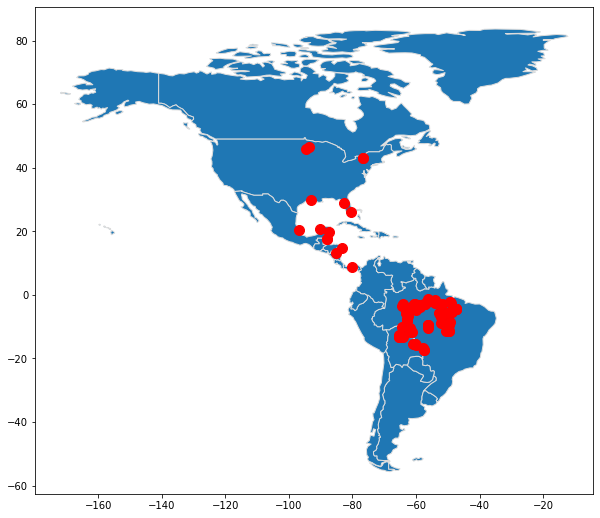

In [7]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
americas = world.loc[world['continent'].isin(['North America', 'South America'])] 
americas.head()

#Ploteamos solo los puntos de salida y llegada de los pájaros, comprobando que el GeoDF con los países
#de las Américas se ha generado bien.

ax2=americas.plot(edgecolor='gainsboro', figsize=[10,10])
full_data2GP.plot(ax=ax2, color='red', markersize=100)


2.4 Generación de 3 GeoDataFrames

In [8]:
from shapely.geometry import Point, LineString

# GeoDataFrame showing path for each bird
path_df = full_data2GP.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index() 
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry) 
path_gdf.crs = {'init' :'epsg:4326'}
path_gdf.head()

# GeoDataFrame showing starting point for each bird
start_df = full_data2GP.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry) 
start_gdf.crs = {'init' :'epsg:4326'}
start_gdf.head()

# Generamos el GeoDF del camino seguido por los pájaros.
#Simplemente, cambiamos nombres y, en la función lambda, la x0 por x1.
# GeoDataFrame showing arrival point for each bird
arrival_df = full_data2GP.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[1]).reset_index()
arrival_gdf = gpd.GeoDataFrame(arrival_df, geometry=arrival_df.geometry) 
arrival_gdf.crs = {'init' :'epsg:4326'}
arrival_gdf.head()

C:\Users\inima\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\inima\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\inima\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

,tag-local-identifier,geometry
0,30048,POINT (-56.29394 -10.45214)
1,30054,POINT (-63.28897 -5.71554)
2,30198,POINT (-88.14608 17.51337)
3,30263,POINT (-62.90648 -7.85363)
4,30275,POINT (-60.26131 -15.48308)


2.5 Mapa con todos estos puntos

<AxesSubplot:>

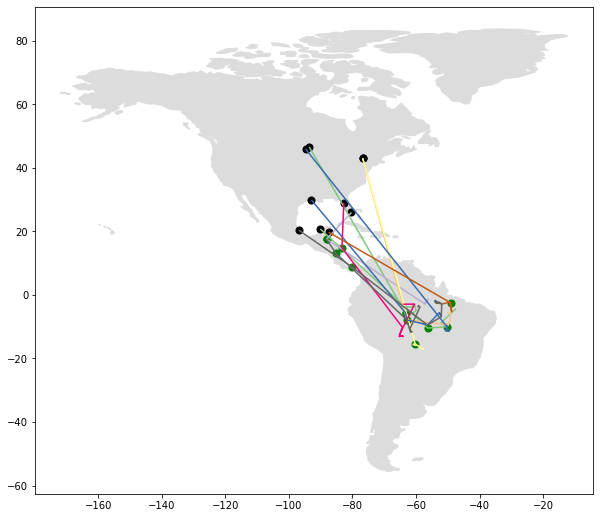

In [9]:
ax3=americas.plot(edgecolor='gainsboro', color='gainsboro',figsize=[10,10])

# Ploteamos todo, los puntos de salida en negro, los de llegada en verde.
#Los caminos los he ploteado según un color map Accent. No coincide exactamente con los del enunciado,
#pero se parece mucho
path_gdf.plot(ax=ax3, cmap='Accent')
start_gdf.plot(ax=ax3, color='black', markersize=50)
arrival_gdf.plot(ax=ax3, color='green', markersize=50)

2.6 Llegada a zona protegida

<AxesSubplot:>

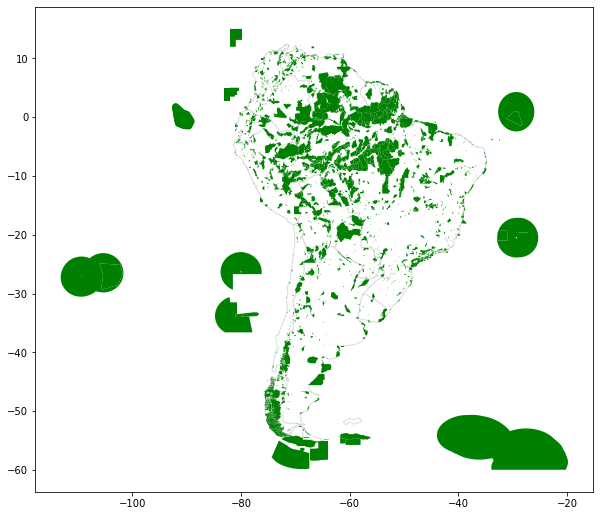

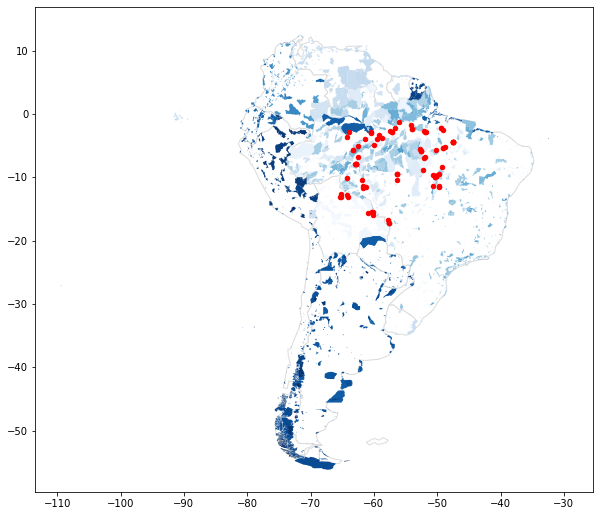

In [12]:
full_data3GP = gpd.read_file("C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional3/observacion_aves/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")

# Country boundaries in South America 
south_america = americas.loc[americas['continent']=='South America']

#Ploteamos en primer lugar todas las áreas protegidas de Sudamérica, tanto las marinas como terrestres

ax4=south_america.plot(edgecolor='gainsboro', figsize=[10,10], color='white')
full_data3GP.plot(ax=ax4, color='green')

#En segundo plot, representamos las áreas protegidas terrestres y los puntos de paso de las aves.
#No tenemos ningún GDF que guarde los puntos por los que pasan las aves, por lo que lo creamos.
#Yo lo he creado filtrando el GDF original con los puntos de paso de las aves por latitud y longitud, utilizando como referencia
#el punto en el mapa (latitud 8.89, longitud -78.15). Este punto estaría en la esquina superior izquierda de Sudamérica,
#por lo que todo punto con latitud menor y longitud mayor estará en Sudamérica. Este es mi criterio de búsqueda. 

full_data4GP=full_data3GP[full_data3GP['MARINE']!='2']
ax5=south_america.plot(edgecolor='gainsboro', figsize=[10,10], color='white')
full_data4GP.plot(ax=ax5, cmap='Blues')
full_data4GP=full_data2GP.loc[(full_data2GP['location-long']>-78.15) & (full_data2GP['location-lat']<8.89)]
full_data4GP.plot(ax=ax5, color='red', markersize=20)
